# Customer Segmentation Analysis & Modeling

In [1]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import warnings
from sklearn.cluster import KMeans

In [2]:
#loading data
data=pd.read_csv(r"C:\Users\Admin\Downloads\marketing_campaign.csv")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

# data preprocessing

In [4]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
mean=data['Income'].mean()
mean

52247.25135379061

In [6]:
data=data.fillna(mean)
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [7]:
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
data.shape

(2240, 29)

In [10]:
#correct the format
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")

In [11]:
# Feature Engineering
import datetime as dt

# Year of subscription
data["year_Dt"] = data['Dt_Customer'].dt.year

# Age at subscription
data['age_Dt'] = data["year_Dt"] - data["Year_Birth"]

# Month of subscription
data["month_Dt"] = data["Dt_Customer"].dt.month

# Current age of the user
data["Age"] = dt.datetime.now().year - data["Year_Birth"]

In [12]:
#Maping month from integer value to String
data.month_Dt = data.month_Dt.map({
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
} )


In [13]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'year_Dt', 'age_Dt', 'month_Dt', 'Age'],
      dtype='object')

In [14]:
data.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [15]:
# Number of Sample that had Marital_Status equal to Absurd
data[ data.Marital_Status == "Absurd"]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,year_Dt,age_Dt,month_Dt,Age
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,1,0,0,3,11,1,2012,19,December,31
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,...,0,0,0,3,11,0,2014,57,January,67


In [16]:
# Define the mapping dictionary
category_mapping = {
    'Single': 'single',
    'Together': 'single', 
    'Married': 'married',
    'Divorced': 'die/widow',
    'Widow': 'die/widow',
    'Alone': 'single',
    'Absurd': 'single',  
    'YOLO': 'single'
}


In [17]:
# map Dictonary 
data.Marital_Status = data.Marital_Status.map(category_mapping)

In [18]:
# Define the mapping dictionary
category_mapping = {
    'Basic': 'Basic',
    'Graduation': 'Graduation',
    'Master': 'Master',
    '2n Cycle': 'Master',
    'PhD': 'PhD'
}

# Apply the mapping to the original array
data["Education"] =data["Education"].map(category_mapping)

In [19]:
# Detect outliers in Year of Birth
data.Year_Birth.quantile(.25)
Q1 = data['Year_Birth'].quantile(0.25)
Q3 = data['Year_Birth'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1
#select the bounder
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Year_Birth'] < lower_bound) | (data['Year_Birth'] > upper_bound)].index

# Drop outliers
data.drop(outliers ,inplace =True)

# EDA

In [20]:
data.sample()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,year_Dt,age_Dt,month_Dt,Age
165,4370,1966,Graduation,single,43482.0,2,1,2013-11-13,83,18,...,0,0,0,3,11,0,2013,47,November,58


In [21]:
pd.DataFrame(data.Education.value_counts())

,count
Education,
Graduation,1127
Master,571
PhD,485
Basic,54


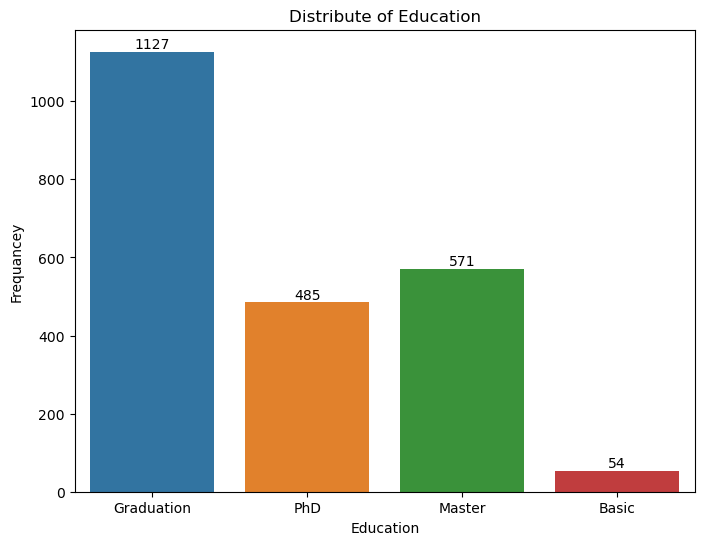

In [22]:
plt.figure(figsize=(8,6))
plt.title("Distribute of Education")
figure = sns.countplot(x= data['Education'])
for contain in figure.containers :
    figure.bar_label(contain)
plt.ylabel("Frequancey")

plt.show()

In [23]:
pd.DataFrame(data.groupby("Education")["Income"].mean()).round(2)

,Income
Education,
Basic,20306.26
Graduation,52715.76
Master,51073.02
PhD,56048.66


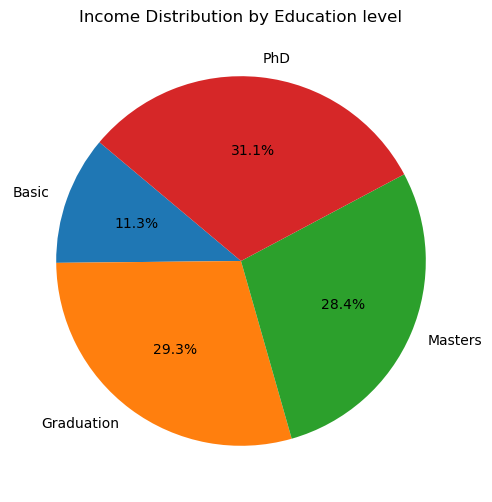

In [24]:
education_levels=['Basic','Graduation','Masters','PhD']
income=[20306.26,52715.76,51073.02,56048.66]
plt.figure(figsize=(6,6))
plt.pie(income,labels=education_levels,autopct='%1.1f%%',startangle=140)
plt.title('Income Distribution by Education level')
plt.show()

In [26]:
pd.DataFrame(data.Marital_Status.value_counts())

,count
Marital_Status,
single,1065
married,864
die/widow,308


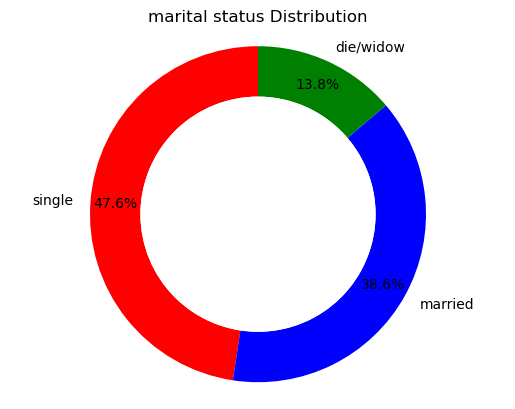

In [27]:
Marital_Status=['single','married','die/widow']
count=[1065,864,308]
fig,ax=plt.subplots()
ax.pie(count,labels=Marital_Status,autopct='%1.1f%%',startangle=90,wedgeprops={'width':.3},pctdistance=0.85,colors=['red','blue','green'])
centre_circle=plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.title('marital status Distribution')
plt.show()

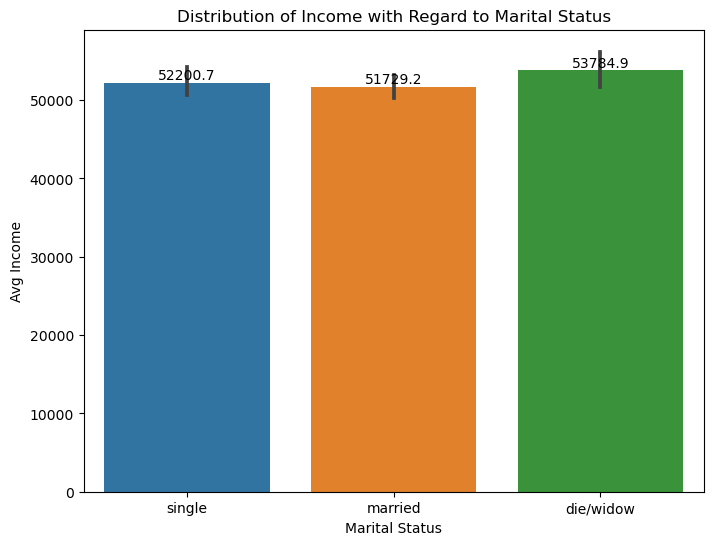

In [28]:
plt.figure(figsize=(8,6))
plt.title("Distribution of Income with Regard to Marital Status")
figure = sns.barplot(x= data['Marital_Status'] , y =data["Income"])
for contain in figure.containers :
    figure.bar_label(contain)
plt.ylabel("Avg Income")
plt.xlabel("Marital Status")
plt.show()

In [29]:
pd.DataFrame(data.year_Dt.value_counts())

,count
year_Dt,
2013,1187
2014,556
2012,494


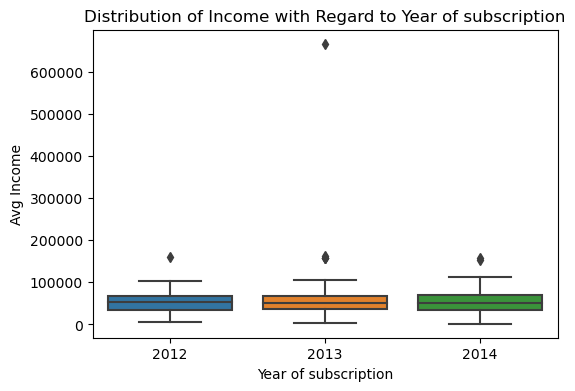

In [30]:
plt.figure(figsize=(6,4))
plt.title("Distribution of Income with Regard to Year of subscription")
sns.boxplot(x= data['year_Dt'] , y =data["Income"])

plt.ylabel("Avg Income")
plt.xlabel("Year of subscription")
plt.show()

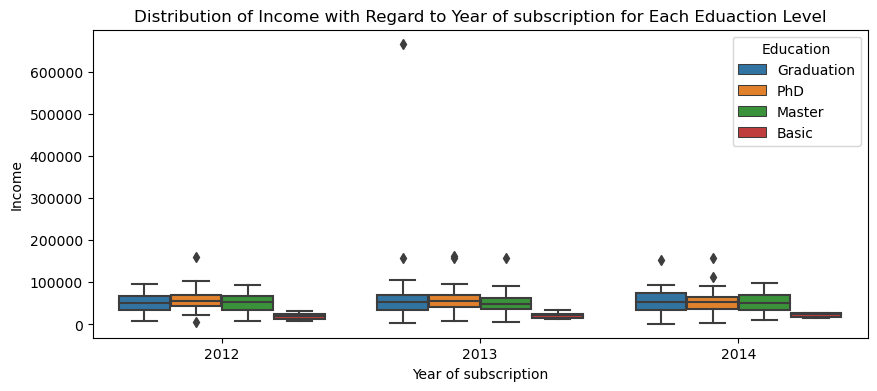

In [32]:
plt.figure(figsize=(10,4))
plt.title("Distribution of Income with Regard to Year of subscription for Each Eduaction Level")
sns.boxplot(x= data['year_Dt'] , y =data["Income"] , hue=data.Education)

plt.ylabel("Income")
plt.xlabel("Year of subscription")
plt.show()

In [34]:
pd.pivot_table(data= data, index= data.year_Dt , columns=data.Education , aggfunc={"Income" : ["mean" ,"min" , "max" ]} ).T.round(2)

year_Dt                      2012       2013       2014
            Education                                  
Income max  Basic        30801.00   34445.00   28249.00
            Graduation   95529.00  666666.00  153924.00
            Master       92859.00  157733.00   98777.00
            PhD         160803.00  162397.00  157243.00
       mean Basic        18782.05   20588.96   23108.89
            Graduation   50531.41   52965.57   54150.12
            Master       53259.30   49886.53   51951.29
            PhD          56677.77   57517.45   52940.13
       min  Basic         7500.00   13084.00   14421.00
            Graduation    7500.00    2447.00    1730.00
            Master        7500.00    6560.00   10404.00
            PhD           6835.00    7144.00    4023.00

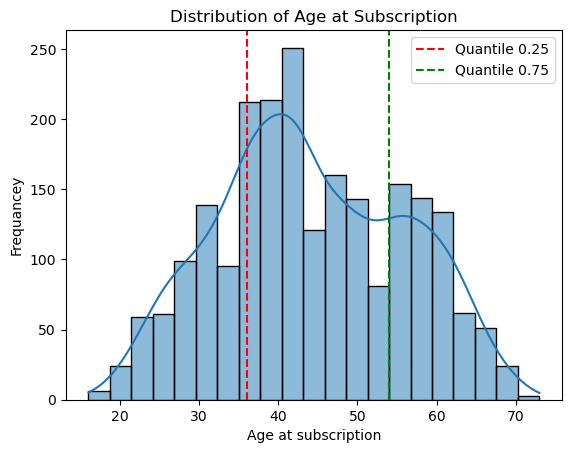

In [35]:
plt.title("Distribution of Age at Subscription")
sns.histplot(x= data.age_Dt , kde=True)


# Get the 25th and 75th quantiles of the data
quantile_25 = data['age_Dt'].quantile(0.25)
quantile_75 = data['age_Dt'].quantile(0.75)

# Draw lines representing the quantiles at 0.25 and 0.75
plt.axvline(x=quantile_25, color='r', linestyle='--', label='Quantile 0.25')
plt.axvline(x=quantile_75, color='g', linestyle='--', label='Quantile 0.75')

# Show the legend for the lines
plt.legend()


plt.ylabel("Frequancey")
plt.xlabel("Age at subscription")

plt.show()

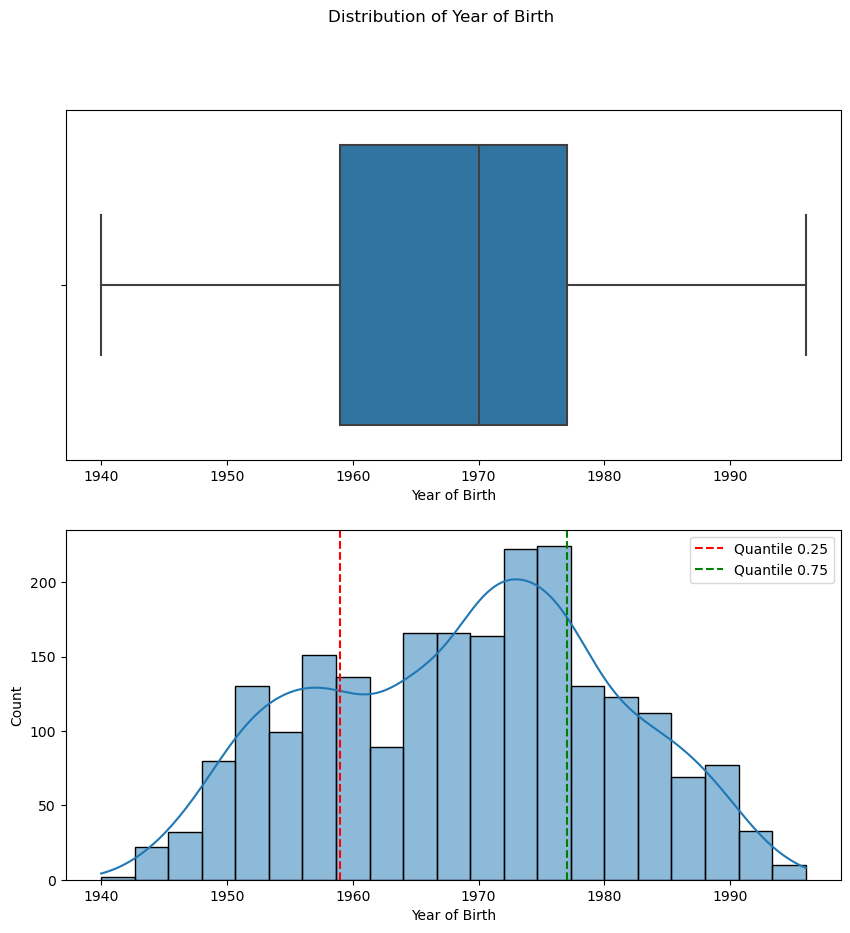

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

fig.suptitle("Distribution of Year of Birth")

# Plot a boxplot on the first subplot (ax[0])
sns.boxplot(x=data['Year_Birth'], ax=ax[0])
# Set the x-axis label for the first subplot
ax[0].set_xlabel("Year of Birth")

# Plot a histogram on the second subplot (ax[1])
sns.histplot(x=data['Year_Birth'], ax=ax[1] ,kde =True)


# Set the x-axis label for the second subplot
ax[1].set_xlabel("Year of Birth")

# Get the 25th and 75th quantiles of the data
quantile_25 = data['Year_Birth'].quantile(0.25)
quantile_75 = data['Year_Birth'].quantile(0.75)

# Draw lines representing the quantiles at 0.25 and 0.75
ax[1].axvline(x=quantile_25, color='r', linestyle='--', label='Quantile 0.25')
ax[1].axvline(x=quantile_75, color='g', linestyle='--', label='Quantile 0.75')

# Show the legend for the lines
ax[1].legend()

plt.show()

In [39]:
data.groupby("Education")[["Kidhome" ,"Teenhome"]].count()

,Kidhome,Teenhome
Education,,
Basic,54,54
Graduation,1127,1127
Master,571,571
PhD,485,485


<Figure size 1000x800 with 0 Axes>

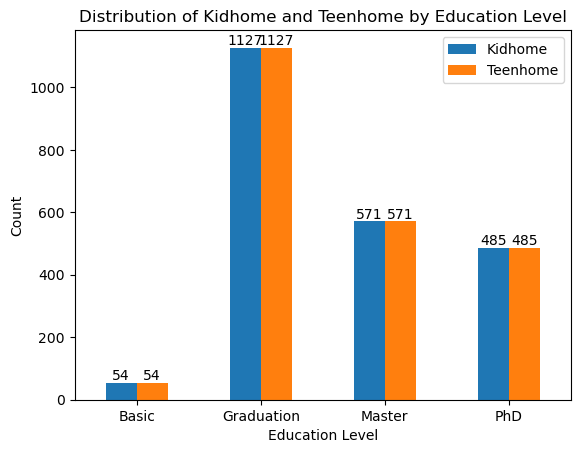

In [40]:
plt.figure(figsize=[10,8])
figure = data.groupby("Education")[["Kidhome" ,"Teenhome"]].count().plot(kind="bar")
for contain in figure.containers :
    figure.bar_label(contain)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Distribution of Kidhome and Teenhome by Education Level")
plt.xticks(rotation=0)
plt.show()

In [42]:
pd.DataFrame(data.groupby("Education")["Recency"].mean()).round(2)

,Recency
Education,
Basic,48.44
Graduation,50.04
Master,47.84
PhD,48.51


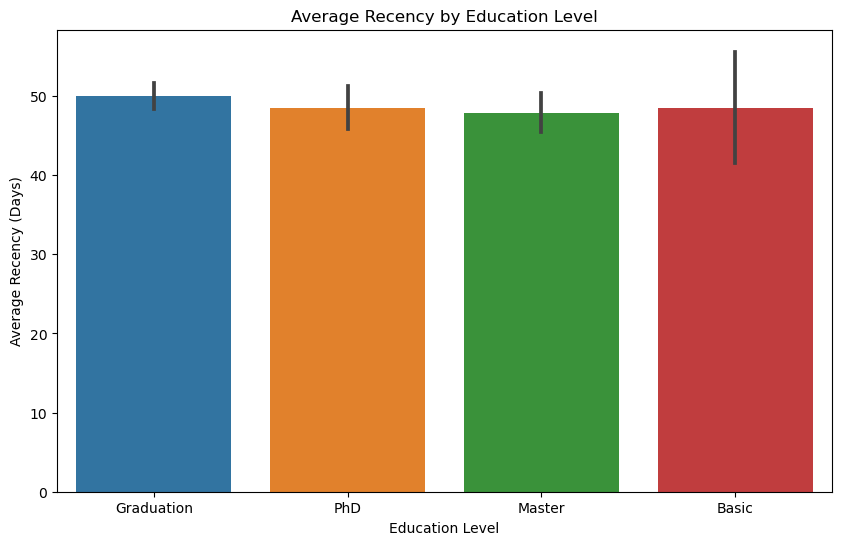

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Recency', data=data ,palette="tab10")

# Add labels and title
plt.xlabel("Education Level")
plt.ylabel("Average Recency (Days)")
plt.title("Average Recency by Education Level")

plt.show()

In [45]:
# Analysis of expenses on products.
cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

tabel = pd.DataFrame({
    'Product': ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
    'AmountSpent': [303.995530, 26.270451, 166.916853, 37.523022, 27.068842, 43.968708]
})

tabel.round(2)

,Product,AmountSpent
0,MntWines,304.00
1,MntFruits,26.27
2,MntMeatProducts,166.92
3,MntFishProducts,37.52
4,MntSweetProducts,27.07
5,MntGoldProds,43.97


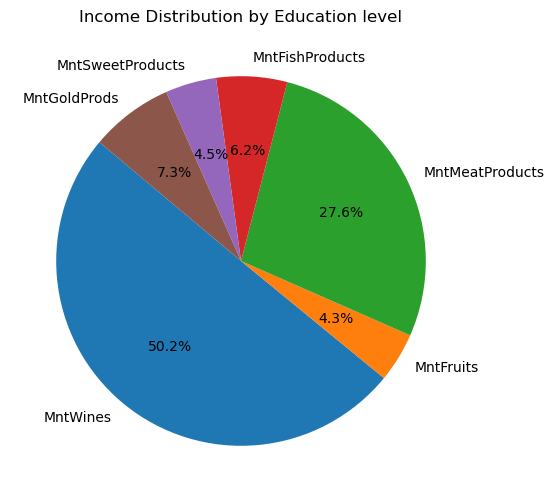

In [46]:
education_levels=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
income=[304,26.27,166.92,37.52,27.07,43.97]
plt.figure(figsize=(6,6))
plt.pie(income,labels=education_levels,autopct='%1.1f%%',startangle=140)
plt.title('Income Distribution by Education level')
plt.show()

In [48]:
grouped_data =data.groupby("Education")[cols].mean().round(2)
grouped_data

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,
Basic,7.24,11.11,11.44,17.06,12.11,22.83
Graduation,284.27,30.77,179.49,43.15,31.37,50.85
Master,286.25,24.32,156.06,37.66,25.89,42.63
PhD,403.77,19.79,167.79,26.57,20.13,31.92


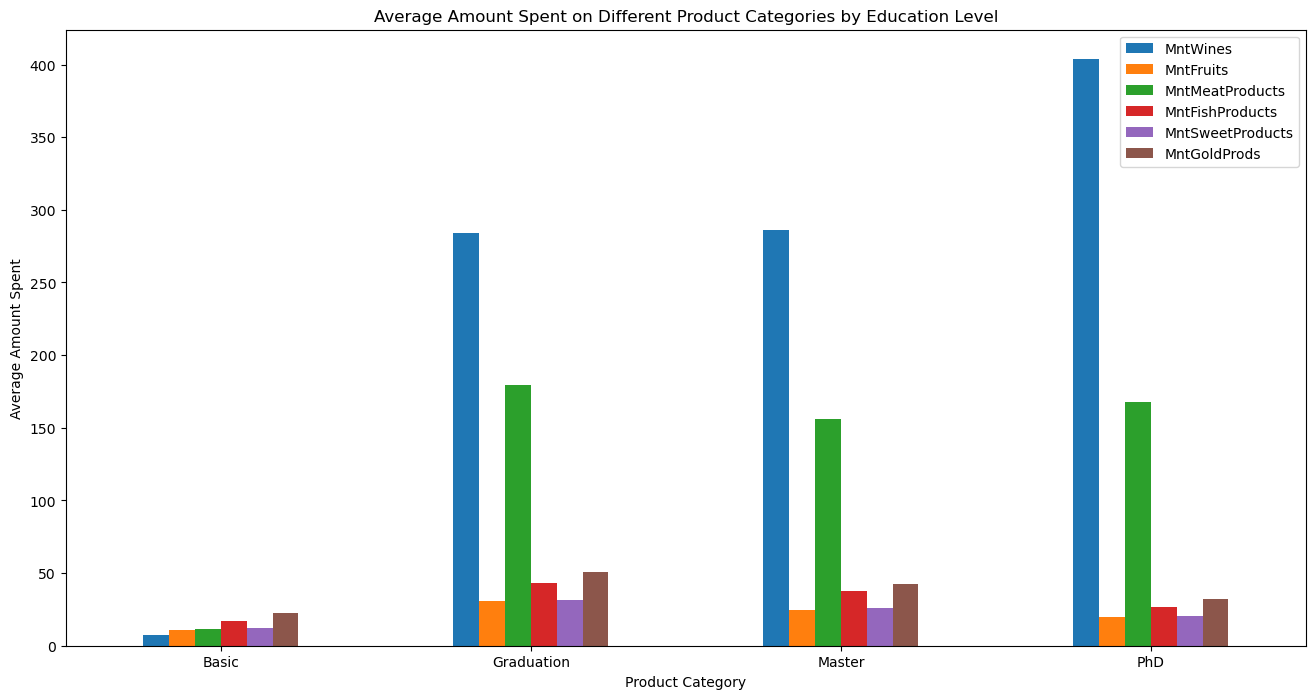

In [49]:
figure =grouped_data.plot(kind= "bar" ,figsize=[16,8])
# Add labels and title
plt.xlabel("Product Category")
plt.ylabel("Average Amount Spent")
plt.title("Average Amount Spent on Different Product Categories by Education Level")
plt.xticks(rotation=0)
plt.show()

In [51]:
#  Analysis of Purchases
cols = [ 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

tabel = data.groupby("Education")[cols].mean()
tabel.round(2)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Education,,,,,
Basic,1.80,1.89,0.48,2.85,6.87
Graduation,2.31,4.13,2.73,5.83,5.29
Master,2.37,3.93,2.49,5.77,5.28
PhD,2.38,4.42,2.96,6.07,5.27


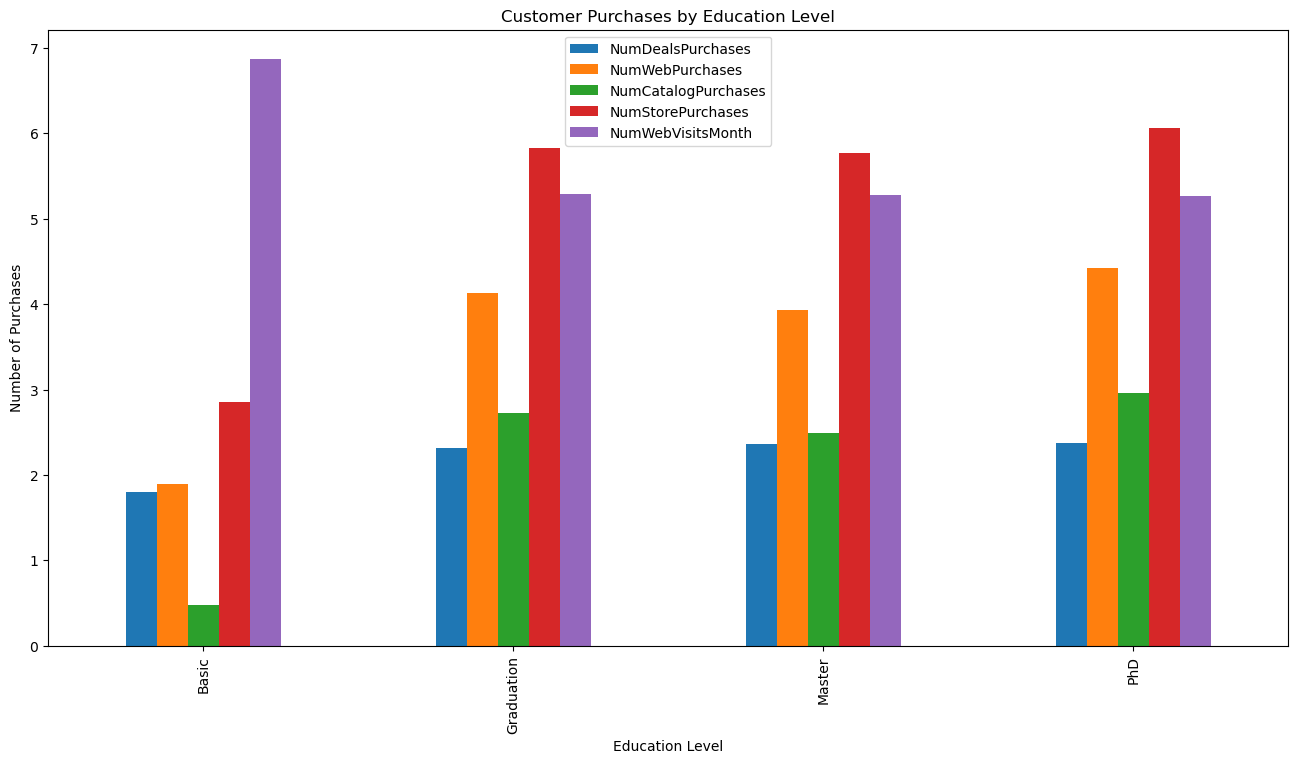

In [52]:
figure =tabel.plot(kind= "bar" ,figsize=[16,8])

plt.xlabel("Education Level")
plt.ylabel("Number of Purchases")
plt.title("Customer Purchases by Education Level")
plt.show()

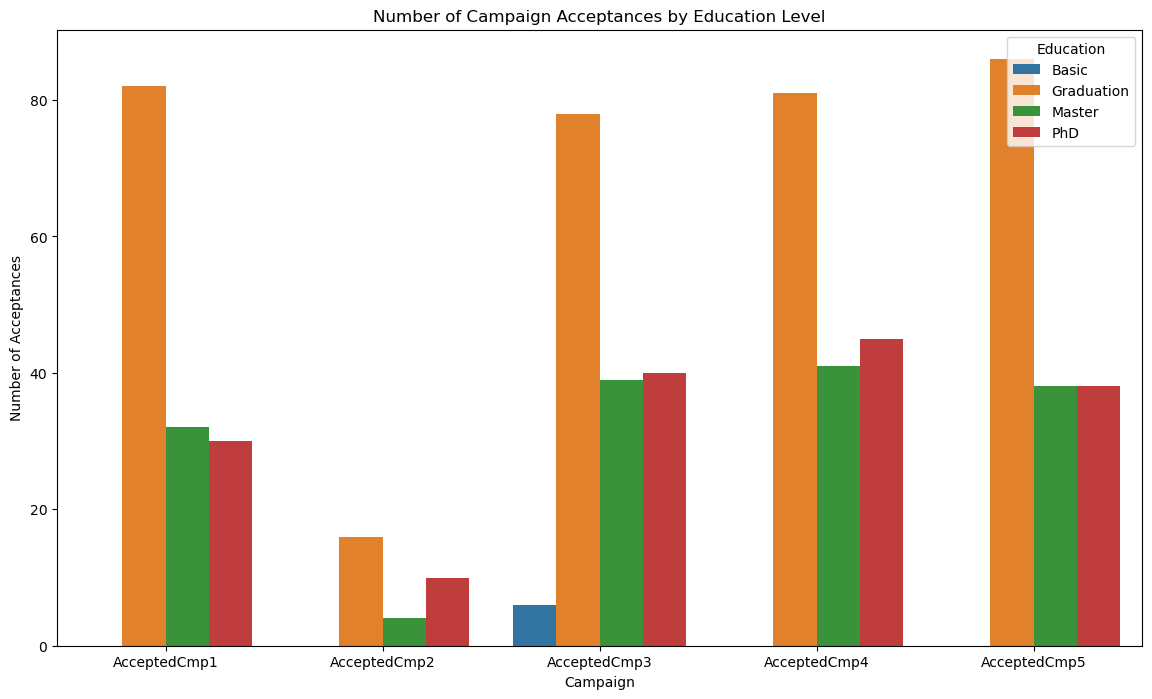

In [54]:
# Analysis of marketing campaigns.
cols = [ 'AcceptedCmp1', 'AcceptedCmp2' ,'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
grouped_data = data.groupby("Education")[cols].sum().reset_index()

melted_data = grouped_data.melt(id_vars='Education', var_name='Campaign', value_name='Count')

# graph 
plt.figure(figsize=(14, 8))
sns.barplot(x='Campaign', y='Count', hue='Education', data=melted_data)

# set labels and title
plt.xlabel("Campaign")
plt.ylabel("Number of Acceptances")
plt.title("Number of Campaign Acceptances by Education Level")

plt.show()

# modeling

In [55]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,year_Dt,age_Dt,month_Dt,Age
0,5524,1957,Graduation,single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,2012,55,September,67
1,2174,1954,Graduation,single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,2014,60,March,70
2,4141,1965,Graduation,single,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,2013,48,August,59
3,6182,1984,Graduation,single,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,2014,30,February,40
4,5324,1981,PhD,married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,2014,33,January,43


In [56]:
data.drop('ID',inplace=True,axis=1)

In [57]:
data.dtypes

Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue   

In [58]:
# 3 catogorical columns

In [59]:
le=LabelEncoder()

In [60]:
data.Education=le.fit_transform(data['Education'])
data.Marital_Status=le.fit_transform(data['Marital_Status'])

In [61]:
data["month_Dt"] =data.month_Dt.map( {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}
)

In [62]:
data.dtypes

Year_Birth                      int64
Education                       int32
Marital_Status                  int32
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue   

In [63]:
from sklearn.preprocessing import StandardScaler
std =StandardScaler()

In [64]:
# Drop Dt_Customer
data.drop("Dt_Customer" ,axis =1 , inplace = True)

In [65]:
train_data = std.fit_transform(data)
scale_data = pd.DataFrame(data=train_data ,columns= data.columns)
scale_data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,year_Dt,age_Dt,month_Dt,Age
0,-1.017296,-0.791816,0.936343,0.235698,-0.825388,-0.930227,0.307272,0.983671,1.554623,1.680253,...,-0.262299,-0.11659,-0.09498,0.0,0.0,2.386966,-1.501298,0.926515,0.726695,1.017296
1,-1.273722,-0.791816,0.936343,-0.235355,1.032151,0.906417,-0.383584,-0.870717,-0.636422,-0.713250,...,-0.262299,-0.11659,-0.09498,0.0,0.0,-0.418942,1.420324,1.352541,-0.993837,1.273722
2,-0.333495,-0.791816,0.936343,0.773891,-0.825388,-0.930227,-0.798098,0.362570,0.572430,-0.176928,...,-0.262299,-0.11659,-0.09498,0.0,0.0,-0.418942,-0.040487,0.330079,0.439939,0.333495
3,1.290534,-0.791816,0.936343,-1.022094,1.032151,-0.930227,-0.798098,-0.870717,-0.560868,-0.651196,...,-0.262299,-0.11659,-0.09498,0.0,0.0,-0.418942,1.420324,-1.203613,-1.280593,-1.290534
4,1.034108,1.590555,-0.478927,0.241889,1.032151,-0.930227,1.550812,-0.389289,0.421324,-0.216820,...,-0.262299,-0.11659,-0.09498,0.0,0.0,-0.418942,1.420324,-0.947997,-1.567348,-1.034108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,-0.162544,-0.791816,-0.478927,0.358914,-0.825388,0.906417,-0.107242,1.203582,0.421324,0.066855,...,-0.262299,-0.11659,-0.09498,0.0,0.0,-0.418942,-0.040487,0.159669,-0.133571,0.162544
2233,-1.957523,1.590555,0.936343,0.470386,2.889690,0.906417,0.238186,0.303134,-0.661606,-0.606872,...,3.812443,-0.11659,-0.09498,0.0,0.0,-0.418942,1.420324,2.034182,-0.133571,1.957523
2234,1.034108,-0.791816,-1.894196,0.189488,-0.825388,-0.930227,1.447184,1.794966,0.547246,0.221989,...,-0.262299,-0.11659,-0.09498,0.0,0.0,-0.418942,1.420324,-0.947997,-1.567348,-1.034108
2235,-1.102771,0.399369,0.936343,0.679313,-0.825388,0.906417,-1.419868,0.368513,0.093927,0.208692,...,-0.262299,-0.11659,-0.09498,0.0,0.0,-0.418942,1.420324,1.182131,-1.567348,1.102771


In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principal_components =pca.fit_transform(scale_data)
principal_components

array([[ 3.9434799 , -0.22595094],
       [-2.14065717, -2.30014865],
       [ 1.64622245, -0.07008925],
       ...,
       [ 1.20998848,  1.4096139 ],
       [ 1.94520555, -2.11232862],
       [-1.2888227 , -2.38738954]])

In [67]:
data.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
year_Dt                0
age_Dt                 0
month_Dt               0
Age                    0
dtype: int64

In [68]:
data=data.fillna(0)
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,year_Dt,age_Dt,month_Dt,Age
0,1957,1,2,58138.0,0,0,58,635,88,546,...,0,0,0,3,11,1,2012,55,9,67
1,1954,1,2,46344.0,1,1,38,11,1,6,...,0,0,0,3,11,0,2014,60,3,70
2,1965,1,2,71613.0,0,0,26,426,49,127,...,0,0,0,3,11,0,2013,48,8,59
3,1984,1,2,26646.0,1,0,26,11,4,20,...,0,0,0,3,11,0,2014,30,2,40
4,1981,3,1,58293.0,1,0,94,173,43,118,...,0,0,0,3,11,0,2014,33,1,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,1,1,61223.0,0,1,46,709,43,182,...,0,0,0,3,11,0,2013,46,6,57
2236,1946,3,2,64014.0,2,1,56,406,0,30,...,1,0,0,3,11,0,2014,68,6,78
2237,1981,1,0,56981.0,0,0,91,908,48,217,...,0,0,0,3,11,0,2014,33,1,43
2238,1956,2,2,69245.0,0,1,8,428,30,214,...,0,0,0,3,11,0,2014,58,1,68


In [69]:
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame for principal components
principal_df = pd.DataFrame(data=principal_components, 
                            columns=[f'PC{i+1}' for i in range(len(explained_variance))])

print("Explained variance ratio by each principal component:", explained_variance)
print("Principal components DataFrame:\n")
principal_df

Explained variance ratio by each principal component: [0.22717284 0.11617988]
Principal components DataFrame:



,PC1,PC2
0,3.943480,-0.225951
1,-2.140657,-2.300149
2,1.646222,-0.070089
3,-2.862568,2.146141
4,-0.693999,1.257422
...,...,...
2232,2.389367,-0.375683
2233,-0.539928,-3.778489
2234,1.209988,1.409614
2235,1.945206,-2.112329


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


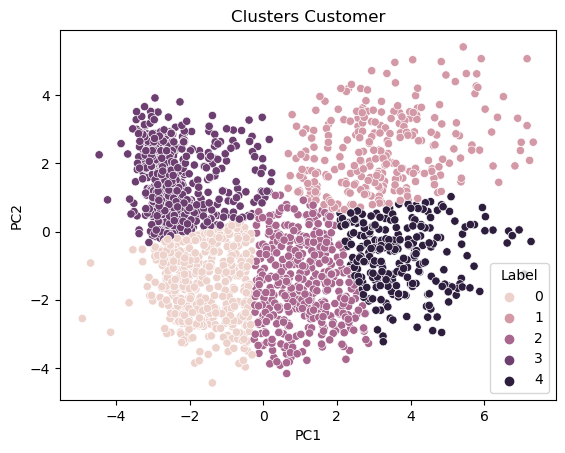

In [70]:
km = KMeans(n_clusters=5)
y_cluster = km.fit_predict(principal_df)
new_data_label = principal_df.copy()
new_data_label["Label"] = y_cluster

plt.title("Clusters Customer")
sns.scatterplot(data= new_data_label , x="PC1" ,y= "PC2" , hue="Label")
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

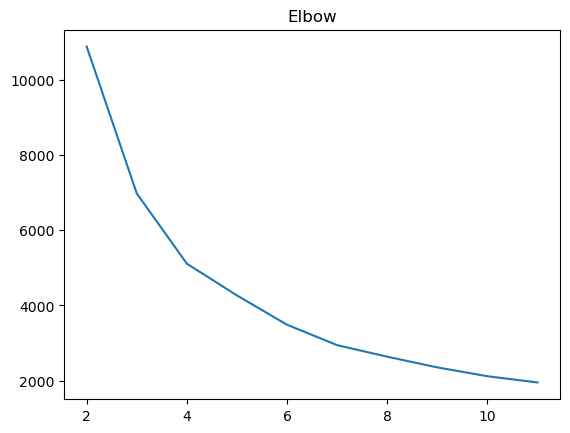

In [71]:
#select The best Cluster 
k = [] 

for i in  range(2,12) :
    km = KMeans(n_clusters=i ,random_state=42)
    km.fit_predict(principal_df)
    k.append(km.inertia_)



#Plot Result

plt.title("Elbow")
plt.plot(np.arange(2,12) , k)
plt.show()

Elbow Method to determine the number of clusters to be formed:


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

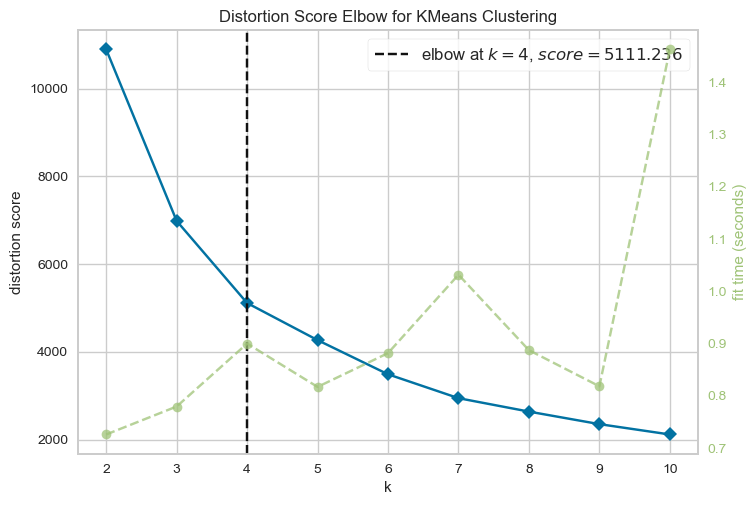

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [78]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(principal_df)
Elbow_M.show()

In [79]:
#k=4

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


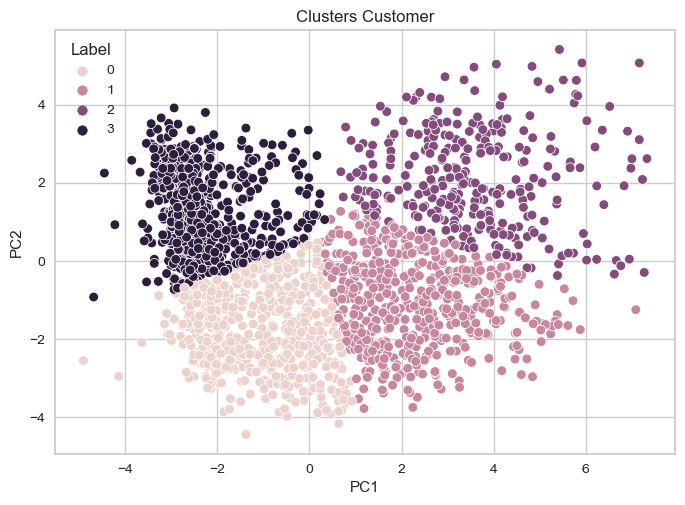

In [81]:
km = KMeans(n_clusters=4)
y_cluster = km.fit_predict(principal_df)
new_data_label = principal_df.copy()
new_data_label["Label"] = y_cluster

plt.title("Clusters Customer")
sns.scatterplot(data= new_data_label , x="PC1" ,y= "PC2" , hue="Label")
plt.show()

<Axes: >

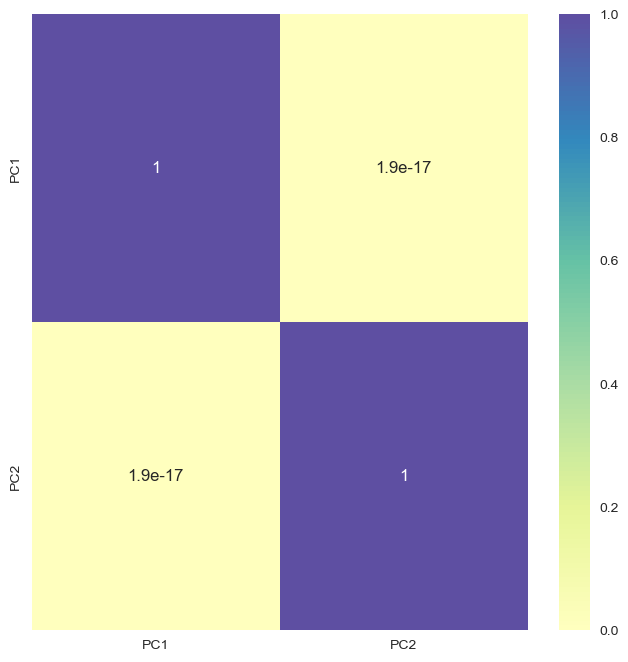

In [80]:
#Check correlation between dimensions using correlation matrix
corrmat=principal_df.corr()
plt.figure(figsize=(8,8))  
sns.heatmap(corrmat,annot=True, cmap="Spectral", center=0)